In [8]:
%matplotlib inline
import itertools
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
plt.style.use('bmh')
from datetime import datetime, timedelta
from ipywidgets import FloatProgress
from IPython.display import display
import cmocean
# library for coordinate transformations
import pyproj
# Map plotting
from mpl_toolkits.basemap import Basemap
from matplotlib import patches

In [9]:
nx = 1678
ny = 1102
N = 15
N_diff = 2
delta = '0.200000'
dt = '3600.000000'

(15, 330, 502)


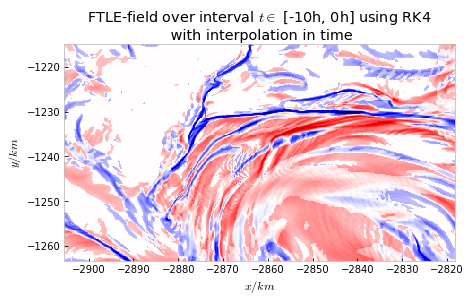

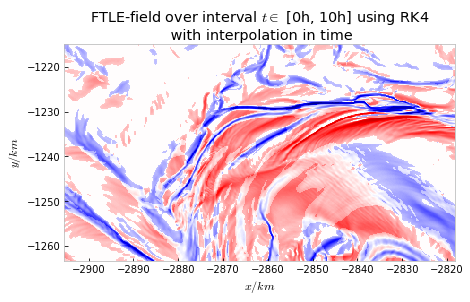

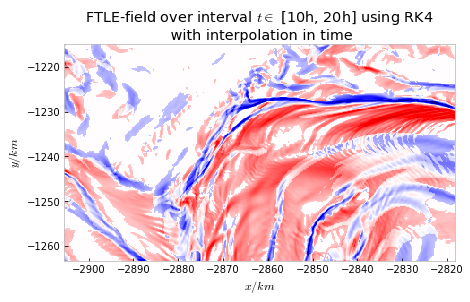

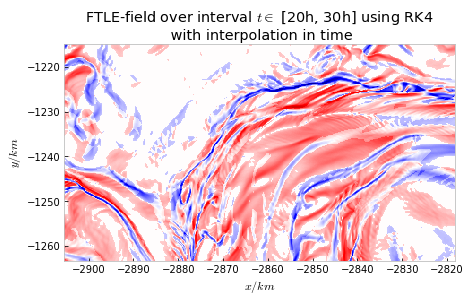

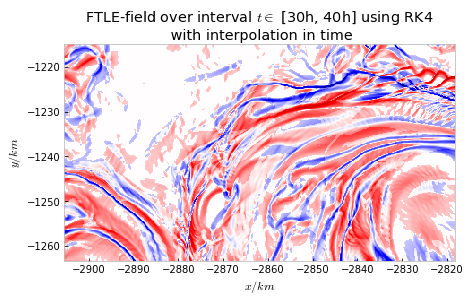

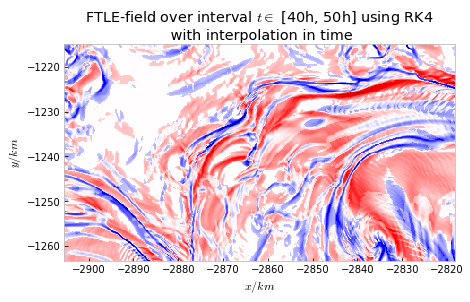

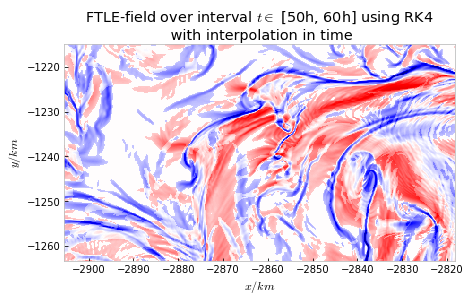

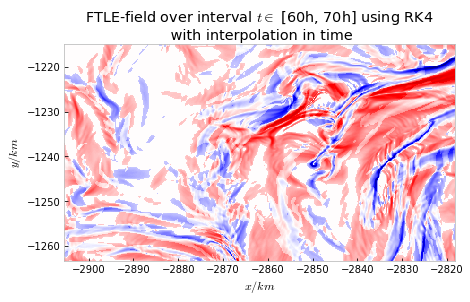

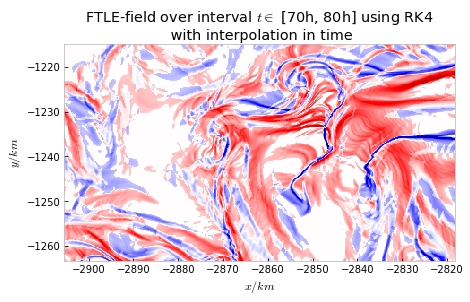

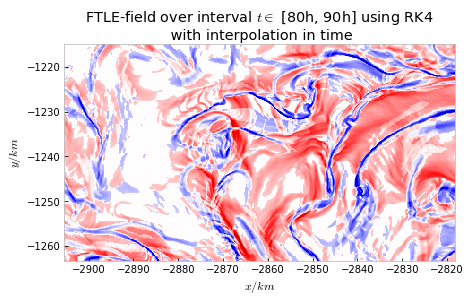

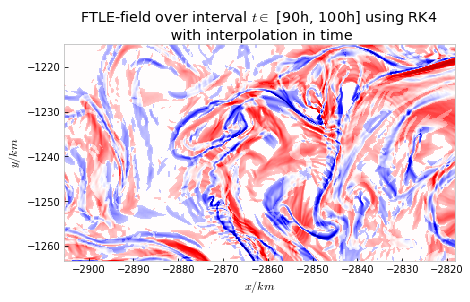

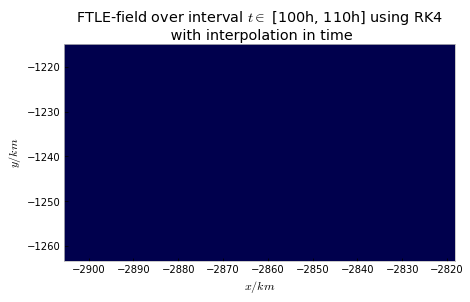

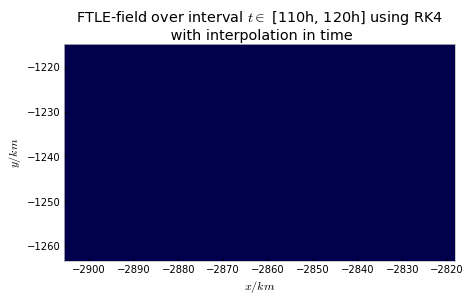

In [11]:

typ = np.float32
filename_forw =  'output/'+str(nx) + '_' + str(ny) + '_ftle_heat_t5_delta' + delta + \
            '_dt' + dt + 'FORW_N' + str(N) +'.txt'
filename_back =  'output/'+str(nx) + '_' + str(ny) + '_ftle_heat_t5_delta' + delta + \
            '_dt' + dt + 'BACK_N' + str(N) +'.txt'

datafile = 'ocean_data/Norkyst-800m-25d.nc'
d  = xr.open_dataset(datafile, decode_times = False)        

uu = d.u.values
vv = d.v.values
uu = uu[0:150,0,:,:] / 1000
vv = vv[0:150,0,:,:] / 1000
step = 10
uu = uu[::step,:,:]
uu = vv[::step,:,:]
# shape = np.genfromtxt(filename, skip_header=1, max_rows=1)

print(uu.shape)
shape = [ny, nx, N]

data_forw = np.fromfile(filename_forw, dtype=typ)  # np.genfromtxt(filename)#
data_forw = np.reshape(data_forw, (int(shape[2]), int(shape[0]), int(shape[1])))

data_back = np.fromfile(filename_back, dtype=typ)  # np.genfromtxt(filename)#
data_back = np.reshape(data_back, (int(shape[2]), int(shape[0]), int(shape[1])))
        
        

data_forw[data_forw < np.max(data_forw) * 1 / 10] = 0.0
data_back[data_back < np.max(data_back) * 1 / 10] = 0.0
data = np.zeros((N,ny,nx))
for i in range(1, N - 2):
    data[i,:,:] = data_forw[i + 1,:,:] - data_back[N - i - 1,:,:]# 



xdata = np.fromfile('output/'+str(nx) + '_' + str(ny) + 'grid_xcords.txt', dtype=typ)
xdata = xdata[1:len(xdata) - 1]
ydata = np.fromfile('output/'+str(nx) + '_' + str(ny) + 'grid_ycords.txt', dtype=typ)
ydata = ydata[1:len(ydata) - 1]




filename_particles =  'output/_particle_ends_N' + str(N - N_diff - 1) +'.txt'
particle_data = np.fromfile(filename_particles, dtype = typ)
particle_data = np.reshape(particle_data, (N - N_diff, 2, (ny + 2) * (nx + 2)))

x = d.X.values
y = d.Y.values
X, Y = np.meshgrid(x,y)

#iterr = 5
BOX = np.zeros(4)
BOX[0] = int(2.1 * nx / 5)
BOX[1] = int(3.4 * nx / 5)
BOX[2] = int(1.7 * ny / 5)
BOX[3] = int(2.8 * ny / 5)
INTERVAL = 0
for iterr in range(N_diff, N + INTERVAL):
    
    fig = plt.figure(figsize = (7,7))
    ax2 = fig.add_subplot(111, aspect='equal')
    vmax = np.amax(np.abs(data[iterr,:,:]))
    vmin = -vmax
    
    
    
    mesh = plt.pcolormesh(xdata[int(BOX[0]):int(BOX[1])], ydata[int(BOX[2]):int(BOX[3])], \
                            data[iterr + INTERVAL, int(BOX[2]):int(BOX[3]), int(BOX[0]):int(BOX[1])], \
                            cmap = plt.get_cmap('seismic'), vmin = vmin, vmax = vmax)
#     ax2.set_title('Particles at $t$ = ' + str((iterr - N_diff) * 10) + 
#                   'h, FTLE-field over interval $t \in$ [' + str((iterr - N_diff + INTERVAL - 1) * 10) + 'h, ' +
#                   str((iterr - N_diff + INTERVAL + 0) * 10) + 'h]')
    ax2.set_title('FTLE-field over interval $t \in$ [' + str((iterr - N_diff + INTERVAL - 1) * 10) + 'h, ' +
                  str((iterr - N_diff + INTERVAL + 0) * 10) + "h] using RK4 \n with interpolation in time")
    ax2.set_xlabel('$x / km$')
    ax2.set_ylabel('$y / km$')
    plt.autoscale(False)
    steps = 1
    timeer = 0
    #plt.streamplot(X[::steps],Y[::steps], uu[iterr + timeer,::steps,::steps], vv[iterr + timeer,::steps,::steps], density=7, 
    #               linewidth=np.sqrt(uu[iterr + timeer,::steps,::steps] *uu[iterr + timeer,::steps,::steps] + vv[iterr + timeer,::steps,::steps] * vv[iterr + timeer,::steps,::steps])*1500, color='k')

    divisor = 10
#     if iterr >= N_diff:
#         particle_box = np.zeros((2, int((ny + 2) * (nx + 2) / (divisor*divisor))))
#         x_start = int((nx + 2) *10/ 20  - (nx + 2) / (2*divisor))
#         y_start = int((ny + 2)* 9 / 20 - (ny + 2) / (2*divisor))
#         for y in range(0, int((ny + 2) / divisor)):
#             for x in range(0,int((nx + 2) / divisor)):
#                 particle_box[0,x + y * int(((nx + 2) / divisor))] = \
#                     particle_data[iterr - N_diff, 0, x_start + x + (y + y_start) * (nx + 2)]
#                 particle_box[1,x + y * int(((nx + 2) / divisor))] = \
#                      particle_data[iterr - N_diff, 1, x_start + x + (y + y_start) * (nx + 2)]
#         plt.scatter(particle_box[0,:], particle_box[1,:],c='k', marker='.', s=0.1)

#         bounding_x_start = xdata[x_start - 1]
#         bounding_y_start = ydata[y_start - 1]
#         bounding_x_len = xdata[x_start + int((nx + 2) / divisor) - 2] - bounding_x_start
#         bounding_y_len = ydata[y_start + int((ny + 2) / divisor) - 2] - bounding_y_start

#         ax2.add_patch(
#             patches.Rectangle(
#                 (bounding_x_start, bounding_y_start),
#                         bounding_x_len,
#                         bounding_y_len,
#                         fill=False,      # remove background
#                         linewidth=1,
#                         edgecolor='k'
#                         )
#                     )
    fig.savefig("figures/nork-ftle-rk4_1_%02d.png" % int((iterr-2)*10), format='png', dpi=200, bbox_inches='tight')
    plt.show()

In [ ]:
# Define some colors and variables, and create a map.
seacolor  = (255/255, 255/255, 255/255)
landcolor = (200/255, 200/255, 200/255)

fig = plt.figure(figsize = (8, 8))
datafile = 'ocean_data/aggregate_be.nc'
d  = xr.open_dataset(datafile, decode_times = False)


lat_0  = 60.5
lon_0  = 3.5
width  = 300000
height = 300000
m = Basemap(
    lat_0      = lat_0,   # Latitude at center of map
    lon_0      = lon_0,   # Longitude at center of map
    width      = width,   # Width of map (in meters)
    height     = height,  # Height of map (in meters)
    resolution = 'h',     # Resolution of coastlines, 'i' is intermediate
    projection = 'stere'  # Map projection, 'stere' is 'stereographic'
)

linewidth = 0.1
alpha     = 0.5
# Fill background with seacolor
m.drawmapboundary(fill_color=seacolor)
# Fill continents with landcolor, and lakes with seacolor
m.fillcontinents(color=landcolor, lake_color=seacolor)
# Draw coastlines with a thin black line
m.drawcoastlines(linewidth = linewidth)
# draw grid of parallels and meridians.
m.drawparallels(np.arange(-90.,91.,5.), linewidth = linewidth, alpha = alpha, labels=[0,0,0,0])
m.drawmeridians(np.arange(-180.,181.,10.), latmax = 90, linewidth = linewidth, alpha = alpha, labels=[0,0,0,0])

# Create projection with metadata from dataset
# and latlon projection
p1 = pyproj.Proj(d.projection_stere.proj4)
p2 = pyproj.Proj(proj='latlong')
# Convert coordinates
print('converting')
X, Y = np.meshgrid(xdata*1000, (ydata)*1000)
lons, lats = pyproj.transform(p1, p2, X, Y)
print('plotting')
step = 1
# create symmetric (vmin, vmax) for colorbar
ftle_time = 3
vmax = np.amax(np.abs(data[ftle_time,:,:]))
vmin = -vmax
#u = d.u.values
#u = u[0,:,:]
#v = d.v.values
#v = v[0,:,:]
#u = u * u + v * v
#u = np.sqrt(u)
mesh = m.pcolormesh(lons[::step,::step], lats[::step,::step], data[ftle_time,::step,::step], latlon = True, vmin = vmin, vmax = vmax, cmap = plt.get_cmap('bwr'))
plt.title('FTLE-field')
#mesh = m.pcolormesh(lons[::step,::step], lats[::step,::step], u[0, ::step,::step], latlon = True, cmap = plt.get_cmap('coolwarm'))
#plt.title('Velocity $|v|$ of surface of the ocean 18. Dec, 15:00')
cax = plt.axes([0.9, 0.05, 0.02, 0.5])
cbar = plt.colorbar(mesh, cax = cax)
cbar.ax.tick_params(labelsize=15) 
plt.tight_layout()

#fig.savefig('figures/map.png', format='png', dpi=300, bbox_inches='tight')

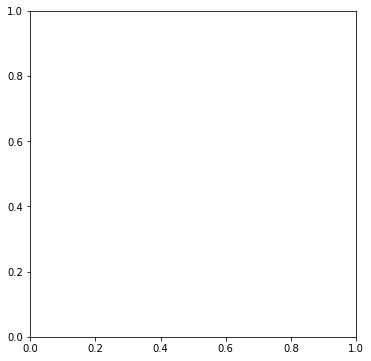

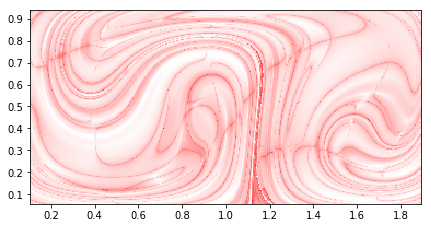

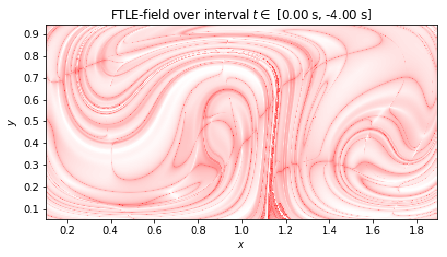

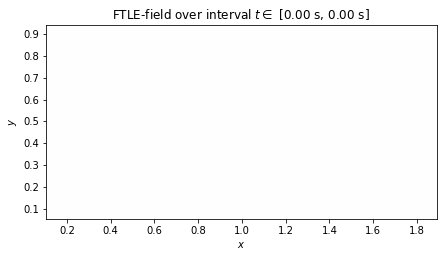

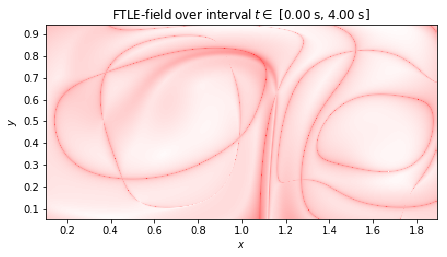

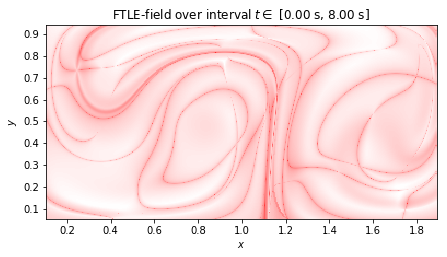

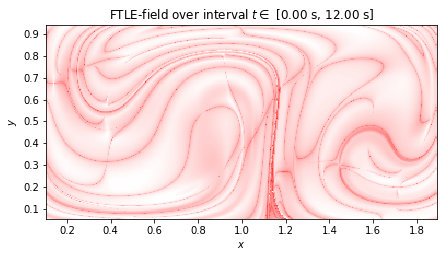

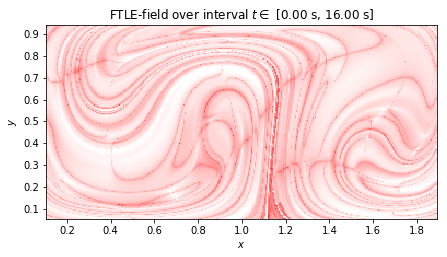

IndexError: index 5 is out of bounds for axis 0 with size 5

In [6]:
nx = 358
ny = 178
N =5
N_diff = 0
delta = '0.005000'
dt = '0.050000'


typ = np.float32
filename_forw =  'output/'+str(nx) + '_' + str(ny) + '_ftle_heat_t5_delta' + delta + \
            '_dt' + dt + 'FORW_N' + str(N) +'.txt'
filename_back =  'output/'+str(nx) + '_' + str(ny) + '_ftle_heat_t5_delta' + delta + \
            '_dt' + dt + 'BACK_N' + str(N) +'.txt'

        

# shape = np.genfromtxt(filename, skip_header=1, max_rows=1)
shape = [ny, nx, N]

data_forw = np.fromfile(filename_forw, dtype=typ)  # np.genfromtxt(filename)#
data_forw = np.reshape(data_forw, (int(shape[2]), int(shape[0]), int(shape[1])))

data_back = np.fromfile(filename_back, dtype=typ)  # np.genfromtxt(filename)#
data_back = np.reshape(data_back, (int(shape[2]), int(shape[0]), int(shape[1])))
        
        

data_forw[(data_forw) < np.max(data_forw)* 0 / 7] = 0.0
data_back[data_back < np.max(data_back)* 0 / 7] = 0.0
data = np.zeros((N,ny,nx))
for i in range(0, N):
    data[i,:,:] = data_forw[i,:,:] - 0 * data_back[N - i - 1,:,:]# 


xdata = np.fromfile('output/'+str(nx) + '_' + str(ny) + 'grid_xcords.txt', dtype=typ)
xdata = xdata[1:len(xdata) - 1]
ydata = np.fromfile('output/'+str(nx) + '_' + str(ny) + 'grid_ycords.txt', dtype=typ)
ydata = ydata[1:len(ydata) - 1]




filename_particles =  'output/_particle_ends_N' + str(N) +'.txt'
particle_data = np.fromfile(filename_particles, dtype = typ)
particle_data = np.reshape(particle_data, (N +1, 2, (ny + 2) * (nx + 2)))

#iterr = 5

INTERVAL = -1
for iterr in range(0, N - INTERVAL*1 + 1):

    
    fig = plt.figure(figsize = (7, 6))
    ax2 = fig.add_subplot(111, aspect='equal')
    vmax = np.amax(np.abs(data[:,:,:]))
    vmin = -vmax #
    mesh = plt.pcolormesh(xdata, ydata, data[iterr +INTERVAL,:,:], cmap = plt.get_cmap('bwr'), vmin = vmin, vmax = vmax)
    ax2.set_title('Particles at $t$ = %1.2f s, FTLE-field over interval $t \in$ [%1.2f s, %1.2f s]' % ((iterr - 1) * 20 / 5 ,((iterr - 1 + INTERVAL + 0) * 0 / 5 ), (iterr - 1 + INTERVAL + 1) * 20 / 5 ))
    ax2.set_xlabel('$x$')
    ax2.set_ylabel('$y$')
    plt.autoscale(False)


    divisor = 10
    if iterr < N + 1 - 100:
        particle_box = np.zeros((2, int((ny + 2) * (nx + 2) / (divisor*divisor))))
        x_start = int((nx + 2) *8/ 20  - (nx + 2) / (2*divisor))
        y_start = int((ny + 2)* 1/ 2 - (ny + 2) / (2*divisor))
        for y in range(0, int((ny + 2) / divisor)):
            for x in range(0,int((nx + 2) / divisor)):
                particle_box[0,x + y * int(((nx + 2) / divisor))] = \
                    particle_data[iterr - 1, 0, x_start + x + (y + y_start) * (nx + 2)]
                particle_box[1,x + y * int(((nx + 2) / divisor))] = \
                     particle_data[iterr - 1, 1, x_start + x + (y + y_start) * (nx + 2)]
        plt.scatter(particle_box[0,:], particle_box[1,:],c='k', marker='.', s=2.5)

        bounding_x_start = xdata[x_start - 1]
        bounding_y_start = ydata[y_start - 1]
        bounding_x_len = xdata[x_start + int((nx + 2) / divisor) - 2] - bounding_x_start
        bounding_y_len = ydata[y_start + int((ny + 2) / divisor) - 2] - bounding_y_start

        ax2.add_patch(
            patches.Rectangle(
                (bounding_x_start, bounding_y_start),
                        bounding_x_len,
                        bounding_y_len,
                        fill=False,      # remove background
                        linewidth=2,
                        edgecolor='k'
                        )
                    )
    fig.savefig("figures/gyre%03d.png" % iterr, format='png', dpi=250, bbox_inches='tight')
    plt.show()

In [1]:
import numpy as np
from matplotlib import pyplot as plt

pi = 3.141592653589793238
w = 1
eps = 0.25
A = 0.1
def f(x, t):
    a = eps * np.sin(w * t)
    b = 1 - eps * 2 * np.sin(w * t)
    return a * x * x + b * x
def df(x, t):
    a = eps * np.sin(w * t)
    b = 1 - eps * 2 * np.sin(w * t)
    return 2 * a * x + b 

def vx(x, y, t):
    return -pi * A * np.sin(pi * f(x,t)) * np.cos(pi * y)
def vy(x, y, t):
    return pi * A * np.cos(pi * f(x,t)) * np.sin(pi * y) * df(x, t)

t = 15

x_points = 100
y_pints = int(x_points / 2)

x = np.linspace(0,2,x_points)
y = np.linspace(0,1,y_pints)
X, Y = np.meshgrid(x, y)

u = vx(X, Y, t)
v = vy(X, Y, t)
#fig = plt.figure(figsize=(7,4))
#plt.quiver(X,Y, u,v, pivot='tip', width=0.0015, units='width',
#               scale=20)
#plt.title('Double Gyre velocity field at t = %d s' % t)
#plt.xlabel('$x$')
#plt.ylabel('$y$')
#plt.xticks(np.linspace(0,2,10))
#plt.yticks(np.linspace(0,1,10))
#plt.savefig('figures/double_gyre_vel.png', dpi=300)

In [2]:
import time

times = 500
tmax = 10
dt = tmax / times
#1361
N = 3150 ** 2
particles = np.zeros((2, 2, N))

uu = np.zeros((times, y_pints, x_points))
vv = np.zeros((times, y_pints, x_points))

for i in range(0, times):
    uu[i, :, :] = vx(X, Y, i*dt)
    vv[i, :, :] = vy(X, Y, i*dt)
    

def k_i(x, y, t, field):
    x_0 = (x * x_points).astype(np.int)
    y_0 = (y * y_pints).astype(np.int)
    t_0 = int(t * times / tmax)
    
    x_d = (x * x_points - x_0)
    y_d = (y * y_pints - y_0)
    t_d = (t * times / tmax - t_0)
    
    c00 = field[t_0, y_0, x_0] * (1 - x_d) + field[t_0 + 1, y_0, x_0] * x_d
    c01 = field[t_0, y_0, x_0 + 1] * (1 - x_d) + field[t_0 + 1, y_0, x_0 + 1] * x_d
    c10 = field[t_0, y_0 + 1, x_0] * (1 - x_d) + field[t_0 + 1, y_0 + 1, x_0] * x_d
    c11 = field[t_0, y_0 + 1, x_0 + 1] * (1 - x_d) + field[t_0 + 1, y_0 + 1, x_0 + 1] * x_d
    
    c0 = c00 * (1 - y_d) + c10 * y_d
    c1 = c01 * (1 - y_d) + c11 * y_d
    
    return c0 * (1 - t_d) + c1 * t_d

def rk4(x, y, t, uu, vv):
    kx1 = k_i(x, y, t, uu)
    ky1 = k_i(x, y, t, vv)
    
    xn = x + dt * kx1 / 2
    yn = y + dt * ky1 / 2
    tn = t + dt / 2
    
    kx2 = k_i(xn, yn, tn, uu)
    ky2 = k_i(xn, yn, tn, vv)
    
    xn = x + dt * kx2 / 2
    yn = y + dt * ky2 / 2
    
    kx3 = k_i(xn, yn, tn, uu)
    ky3 = k_i(xn, yn, tn, vv)
    
    xn = x + dt * kx3
    yn = y + dt * ky3
    tn = t + dt
    
    kx4 = k_i(xn, yn, tn, uu)
    ky4 = k_i(xn, yn, tn, vv)
    
    x = x + (kx1 + 2 * kx2 + 2 * kx3 + kx4) * dt / 6
    y = y + (ky1 + 2 * ky2 + 2 * ky3 + ky4) * dt / 6
    
    out = np.zeros((2, N))
    out[0, :] = x
    out[1, :] = y
    return out


In [10]:


def seed_parties():
    rang = sqrt(N)
    deltax = 0.1 / x_points
    deltay = 0.1 / y_pints
    for j in range(0, rang):
        for i in range(0, rang):
            particles[0, 0, i + rang * j] = (deltax + i) /x_points
            particles[0, 1, i + rang * j] = (deltay + j) /y_pints

start = time.time()
temp = np.zeros((2, N))
temp = particles[0, :, :]
for i in range(0, times - 2):
    temp = rk4(temp[0,:], temp[1,:], i * dt, uu, vv)
    
particles[1, :, :] = temp
end = time.time()

print(-start + end)

3971.6339581012726
